In [1]:
import pandas as pd

## Data check

In [2]:
# Load the training data
train_data_path = '/Users/b._.chan/Documents/ML_model/weblog_data/train.csv'
train_data = pd.read_csv(train_data_path)

test_data_path = '/Users/b._.chan/Documents/ML_model/weblog_data/test.csv'
test_data = pd.read_csv(test_data_path)

# Display the first few rows of the training data
train_data.head()

,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,45.0,839.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,0.0,0.0,Europe,Western Europe,Germany,google,organic,Category8,NaN
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,0.0,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),NaN,NaN
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,Partners,affiliate,NaN,NaN
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,groups.google.com,referral,NaN,Category6_Path_0000


In [3]:
test_data.head()

,sessionID,userID,browser,OS,device,new,quality,duration,bounced,transaction,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path
0,SESSION_252289,USER_206024,Chrome,Linux,desktop,1,75.0,698.0,0,0.0,0.0,Americas,Northern America,United States,(direct),(none),NaN,Category1
1,SESSION_252290,USER_206025,Safari,iOS,tablet,0,1.0,0.0,1,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
2,SESSION_252291,USER_206026,Chrome,Windows,desktop,1,1.0,33.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category2_Path_0082
3,SESSION_252292,USER_206027,Chrome,Android,mobile,1,1.0,76.0,0,0.0,0.0,Americas,Northern America,United States,google,organic,Category8,NaN
4,SESSION_252293,USER_206028,Internet Explorer,Windows Phone,mobile,1,2.0,372.0,0,0.0,0.0,Asia,Southern Asia,India,youtube.com,referral,NaN,Category11_Path_0088


## Column meaning

- sessionID: 세션의 고유 식별자
- userID: 사용자의 고유 식별자
- TARGET: 예측해야 하는 타겟 변수 (조회수)
- browser: 사용자의 브라우저
- OS: 사용자의 운영 체제
- device: 사용자의 장치 유형
- new: 사용자가 새로운지 여부 (1은 새 사용자, 0은 기존 사용자)
- quality: 페이지 품질 점수
- duration: 세션 지속 시간
- bounced: 사용자가 바로 나갔는지 여부 (1은 바로 나간 경우, 0은 그렇지 않은 경우)
- transaction: 거래가 있었는지 여부
- transaction_revenue: 거래로 발생한 수익
- continent: 사용자의 대륙
- subcontinent: 사용자의 소대륙
- country: 사용자의 국가
- traffic_source: 트래픽 소스
- traffic_medium: 트래픽 매체
- keyword: 키워드
- referral_path: 추천 경로

## missing value check

- missing value 가 많은 이 상황에서 별도의 범주를 추가하여 결측치를 대체함.

1. 원본 데이터에서 제공되는 정보의 양을 최대한 유지하여 정보 손실을 줄임.

2. 결측치가 있는 데이터를 제거하거나 완전히 대체하는 것보다 결측치 자체를 정보의 한 형태로 모델에 제공하는 것이 더 좋은 성능을 내지 않을까라고 판단되는데, 그 이유는 모델이 결측치 데이터의 패턴을 인식하고 예측에 활용할 수 있지 않을까 하는 생각.

3. 특정 정보가 없는 사용자들의 행동이나 선호도가 다를 수 있어서 모델이 이를 학습하게 하는 것이 좋아보임.

In [4]:
missing_values_train = train_data.isnull().sum()

print(missing_values_train)

sessionID                   0
userID                      0
TARGET                      0
browser                     0
OS                          0
device                      0
new                         0
quality                     0
duration                    0
bounced                     0
transaction                 0
transaction_revenue         0
continent                   0
subcontinent                0
country                     0
traffic_source              0
traffic_medium              0
keyword                137675
referral_path          161107
dtype: int64


In [5]:
missing_values_test = test_data.isnull().sum()

print(missing_values_test)

sessionID                  0
userID                     0
browser                    0
OS                         0
device                     0
new                        0
quality                    0
duration                   0
bounced                    0
transaction                0
transaction_revenue        0
continent                  0
subcontinent               0
country                    0
traffic_source             0
traffic_medium             0
keyword                43070
referral_path          53891
dtype: int64


In [6]:
train_data['keyword'].fillna('Unknown', inplace=True)
train_data['referral_path'].fillna('Unknown', inplace=True)

test_data['keyword'].fillna('Unknown', inplace=True)
test_data['referral_path'].fillna('Unknown', inplace=True)

missing_values_train_after_update = train_data.isnull().sum()

print(missing_values_train_after_update)

sessionID              0
userID                 0
TARGET                 0
browser                0
OS                     0
device                 0
new                    0
quality                0
duration               0
bounced                0
transaction            0
transaction_revenue    0
continent              0
subcontinent           0
country                0
traffic_source         0
traffic_medium         0
keyword                0
referral_path          0
dtype: int64


In [7]:
missing_values_test_after_update = test_data.isnull().sum()

print(missing_values_test_after_update)

sessionID              0
userID                 0
browser                0
OS                     0
device                 0
new                    0
quality                0
duration               0
bounced                0
transaction            0
transaction_revenue    0
continent              0
subcontinent           0
country                0
traffic_source         0
traffic_medium         0
keyword                0
referral_path          0
dtype: int64


## 이상치 탐지 및 처리

- 변수마다 이상치를 다르게 처리

1. 'Transaction_revenue' : log 변환
범위가 커서 이상치의 영향이 클 것으로 예상되기 때문에 로그 변환을 적용하여 데이터의 분포를 정규 분포에 가깝게 scaling.

2. 'quality' : 이상치 대체 (중앙값)
데이터의 손실을 최소화하기 위해 중앙값으로 대체

3. 'duration' : binning
연속형 데이터를 구간별로 나누어서 범주화하여 데이터의 중요한 특성을 유지함.

4. 'transaction' : 이상치 제거
이상치가 다른 변수들에 비해 적어서 제거했을 때 손실이 크지 않다고 판단됨.

5. 'new', 'bounced' 변수는 범주형이나 이진 변수의 성격을 갖고 있다고 판단되므로 이상치 처리를 하지 않음

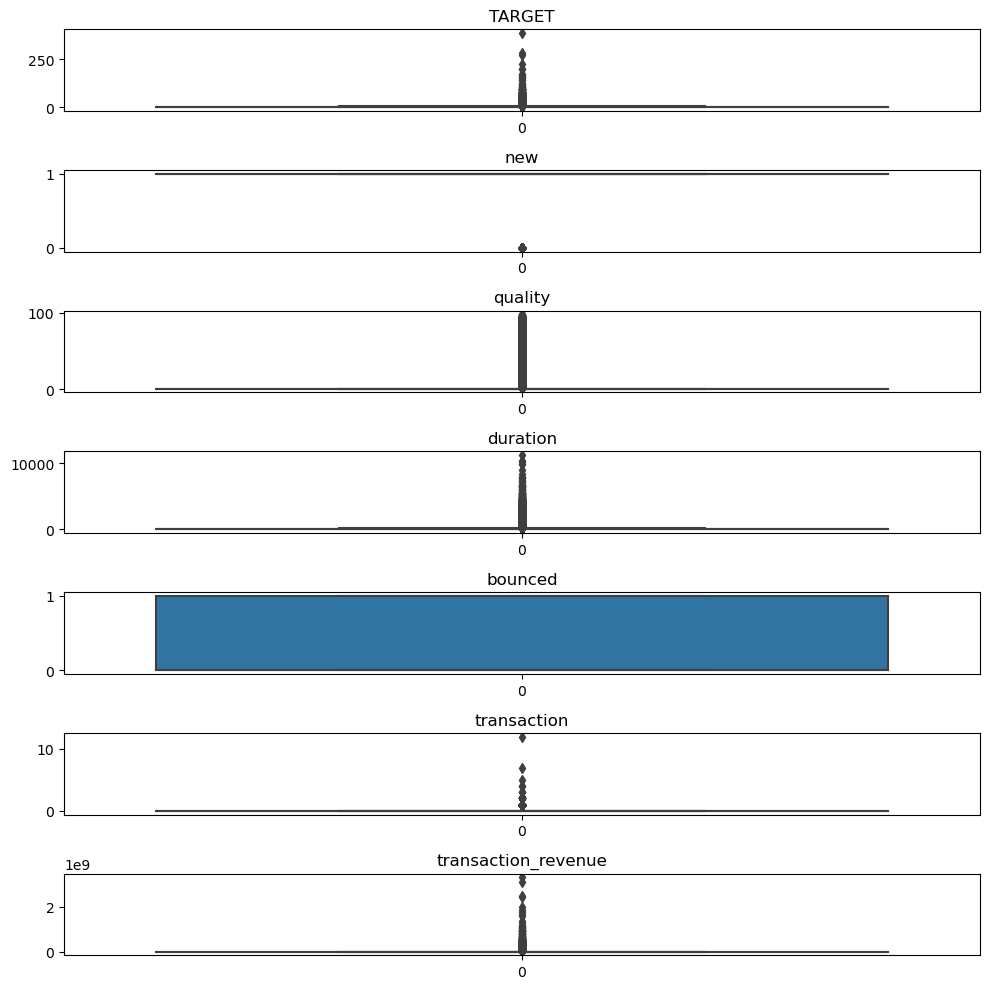

              TARGET            new        quality       duration  \
count  252289.000000  252289.000000  252289.000000  252289.000000   
mean        3.592626       0.751955       3.816805     113.104253   
std         5.509465       0.431879      11.091028     330.876019   
min         1.000000       0.000000       1.000000       0.000000   
25%         1.000000       1.000000       1.000000       0.000000   
50%         2.000000       1.000000       1.000000       3.000000   
75%         4.000000       1.000000       1.000000      71.000000   
max       386.000000       1.000000      98.000000   11186.000000   

             bounced    transaction  transaction_revenue  
count  252289.000000  252289.000000         2.522890e+05  
mean        0.493672       0.009033         9.061248e+05  
std         0.499961       0.100938         2.127689e+07  
min         0.000000       0.000000         0.000000e+00  
25%         0.000000       0.000000         0.000000e+00  
50%         0.000000    

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

descriptive_stats = train_data.describe()

num_features = train_data.select_dtypes(include=['float64', 'int64']).columns
plt.figure(figsize = (10, 10))
for i, col in enumerate(num_features):
    plt.subplot(len(num_features), 1, i+1)
    sns.boxplot(train_data[col])
    plt.title(col)
plt.tight_layout()
plt.show()

print(descriptive_stats)

In [9]:
import numpy as np

train_data['transaction_revenue_log'] = np.log1p(train_data['transaction_revenue'])

quality_median = train_data['quality'].median()
train_data['quality'] = np.where(train_data['quality'] > train_data['quality'].quantile(0.95), quality_median, train_data['quality'])

duration_bins = pd.qcut(train_data['duration'], q=4, labels=False, duplicates='drop')
train_data['duration_binned'] = duration_bins

transaction_threshold = train_data['transaction'].quantile(0.95)
train_data = train_data[train_data['transaction'] <= transaction_threshold]

train_data.head()



,sessionID,userID,TARGET,browser,OS,device,new,quality,duration,bounced,...,transaction_revenue,continent,subcontinent,country,traffic_source,traffic_medium,keyword,referral_path,transaction_revenue_log,duration_binned
0,SESSION_000000,USER_000000,17.0,Chrome,Macintosh,desktop,0,1.0,839.0,0,...,0.0,Americas,Northern America,United States,google,organic,Category8,Unknown,0.0,2
1,SESSION_000001,USER_000001,3.0,Chrome,Windows,desktop,1,1.0,39.0,0,...,0.0,Europe,Western Europe,Germany,google,organic,Category8,Unknown,0.0,1
2,SESSION_000002,USER_000002,1.0,Samsung Internet,Android,mobile,1,1.0,0.0,1,...,0.0,Asia,Southeast Asia,Malaysia,(direct),(none),Unknown,Unknown,0.0,0
3,SESSION_000003,USER_000003,1.0,Chrome,Macintosh,desktop,1,1.0,0.0,1,...,0.0,Americas,Northern America,United States,Partners,affiliate,Unknown,Unknown,0.0,0
4,SESSION_000004,USER_000004,1.0,Chrome,iOS,mobile,0,1.0,0.0,1,...,0.0,Americas,Northern America,United States,groups.google.com,referral,Unknown,Category6_Path_0000,0.0,0


## Primary key uniqueness

- sessionID가 Primary key..!


In [10]:
is_sessionID_unique = train_data['sessionID'].is_unique

is_userID_unique = train_data['userID'].is_unique

is_combined_unique = train_data[['sessionID', 'userID']].duplicated().sum() == 0

print(f"SessionID is unique : {is_sessionID_unique}")
print(f"UserID is unique : {is_userID_unique}")
print(f"Combination of SessionID and UserID is unique : {is_combined_unique}")

SessionID is unique : True
UserID is unique : False
Combination of SessionID and UserID is unique : True


## Label(Target) 분포 확인 방법

In [11]:
label_distribution = train_data['TARGET'].value_counts(normalize=True)
print(label_distribution)

TARGET
1.0      0.503869
2.0      0.134716
3.0      0.094509
4.0      0.057141
5.0      0.042930
           ...   
97.0     0.000004
76.0     0.000004
125.0    0.000004
270.0    0.000004
199.0    0.000004
Name: proportion, Length: 110, dtype: float64


<Axes: xlabel='TARGET', ylabel='count'>

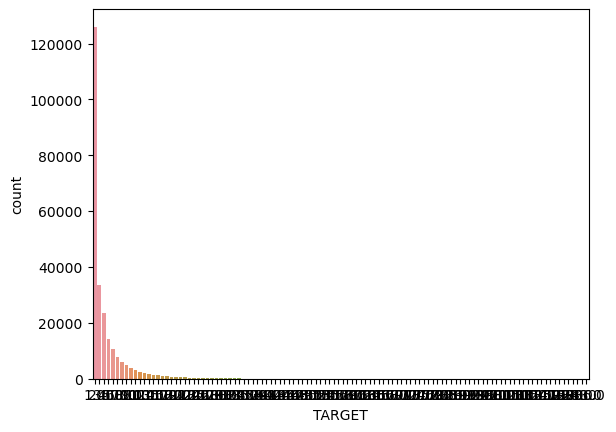

In [12]:
import seaborn as sns
sns.countplot(x='TARGET', data=train_data)

### 변수 간 상관관계 검사

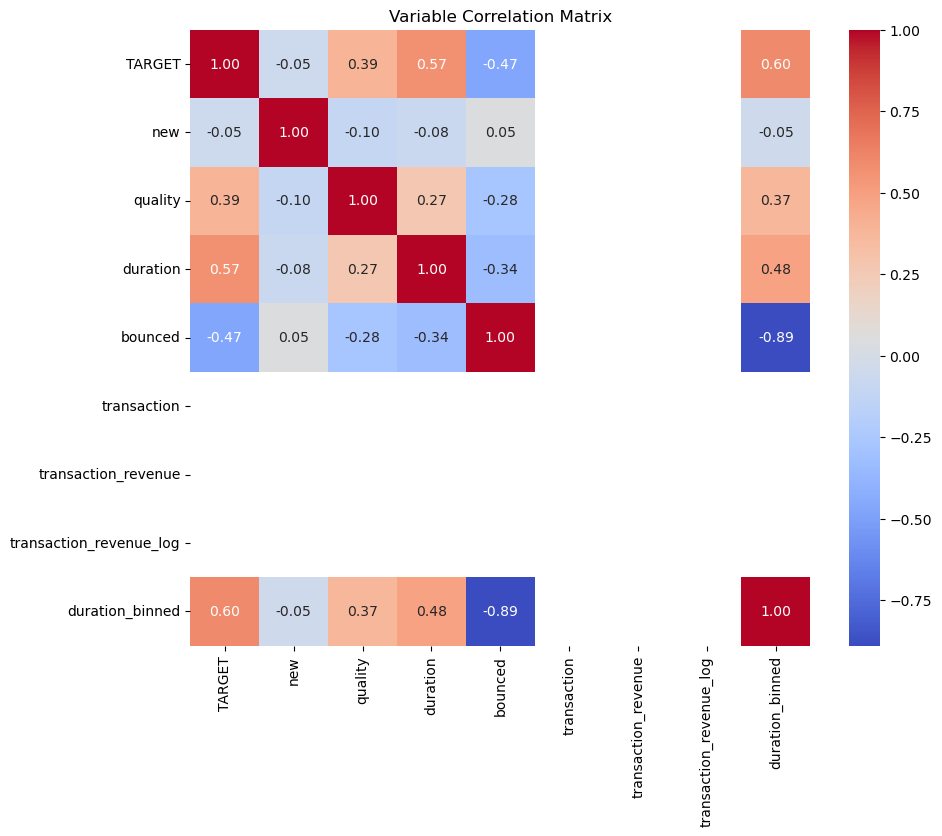

In [13]:
numeric_data = train_data.select_dtypes(include=['float64','int64'])

correlation_matrix = numeric_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap = 'coolwarm')
plt.title('Variable Correlation Matrix')
plt.show()


1. Target - duration
높은 상관관계 (0.57) 존재
2. Target - bounced 
음의 상관관계 (-0.47) 존재
3. duratio_binned - other variable
duration 을 구간으로 나눈 것이 duration_binned
Target (0.60), bounced (-0.89) 음의 상관관계 존재하는데, 구간으로 나누는 것이 'bounced' column 과 밀접한 연관성 존재 판단가능함.
4. quality - bounced
약한 음의 상관관계(-0.27) 존재

## Category variable encoding